# How to pull data from database into Python for more in depth analysis
In this example, we use chinook.db. It is a SQLite sample database that can be downloaded here: https://www.sqlitetutorial.net/sqlite-sample-database/

In [1]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
%matplotlib inline 

In [2]:
conn = sqlite3.connect('chinook.db')
conn

In [3]:
sql = """
SELECT c.CustomerId id,c.LastName name, i.total total
FROM invoices i
LEFT JOIN customers c on c.CustomerId = i.CustomerId;
"""

In [4]:
df = pd.read_sql_query(sql,conn)
df.head()

,id,name,total
0,2,Köhler,1.98
1,4,Hansen,3.96
2,8,Peeters,5.94
3,14,Philips,8.91
4,23,Gordon,13.86


Text(0.5, 0.98, 'Total Invoice')

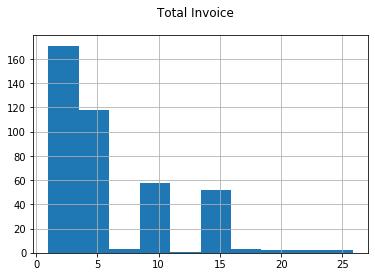

In [5]:
df.total.hist()
plt.suptitle('Total Invoice')

In [6]:
#Average invoice paid by customer
df.total.mean()

5.651941747572814

In [7]:
#Average invoice total paid by customer with the last name 'Chase'.
df[df.name == 'Chase'].total.mean()

5.374285714285714

In [8]:
sql1 = """
SELECT t.name name, t.Milliseconds ms, g.name genre
FROM tracks t 
INNER JOIN genres g ON t.GenreId = g.GenreId
WHERE g.name in ('Rock','Metal')
ORDER by t.Milliseconds DESC
"""

In [9]:
df1 = pd.read_sql_query(sql1,conn)
df1.head()

,name,ms,genre
0,Dazed And Confused,1612329,Rock
1,Space Truckin',1196094,Rock
2,Dazed And Confused,1116734,Rock
3,We've Got To Get Together/Jingo,1070027,Rock
4,Funky Piano,934791,Rock


To close connection, run conn.close()

Text(0.5, 0.98, 'Minutes of Songs')

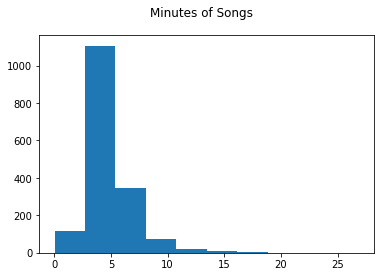

In [10]:
# Histogram of minutes of songs
minutes=(df1.ms/1_000)/60
plt.hist(minutes)
plt.suptitle('Minutes of Songs')

In [11]:
df1['minutes'] = minutes
df1.head()

,name,ms,genre,minutes
0,Dazed And Confused,1612329,Rock,26.872150
1,Space Truckin',1196094,Rock,19.934900
2,Dazed And Confused,1116734,Rock,18.612233
3,We've Got To Get Together/Jingo,1070027,Rock,17.833783
4,Funky Piano,934791,Rock,15.579850


In [16]:
# Questions : In total, how many days worth of music is rock and metal if you add them up 

print('Rock',(sum(df1.minutes[df1.genre == 'Rock'])/60)/24)
print('Metal',(sum(df1.minutes[df1.genre == 'Metal'])/60)/24)

Rock 4.261936643518519
Metal 1.3408135648148152


In [13]:
df1.groupby(['genre']).sum()['minutes']/(60*24)

genre
Metal    1.340814
Rock     4.261937
Name: minutes, dtype: float64